# Turkish crowdfunding startups
Оригінальний датасет: https://archive.ics.uci.edu/dataset/1025/turkish+crowdfunding+startups

Назви ознак у перекладеній версії:

- `id`: The unique identifier of the project.
- `platform`: The crowdfunding platform where the project is hosted.
- `funding_type`: Type of crowdfunding (e.g., reward, donation).
- `category`: Category of the project.
- `funding_method`: Funding method (e.g., all or nothing).
- `project_name`: Project name.
- `project_owner_name`: Name of the project owner.
- `project_owner_gender`: Gender of the project owner.
- `project_owner_backed`: Number of projects the owner has backed.
- `project_owner_subscribed`: Number of projects the owner has subscribed to.
- `owner_n_projects`: Number of projects owned by the project owner.
- `owner_in_teams`: Number of teams the project owner is part of.
- `location`: Location of the project owner.
- `region`: Region of the project.
- `year`: Year the project was launched.
- `project_start_date`: Start date of the project.
- `project_end_date`: End date of the project.
- `project_duration`: Duration of the project in days.
- `has_video`: Whether the project has a promotional video.
- `video_length`: Length of the promotional video.
- `images`: Number of images related to the project.
- `faq`: Whether the project has a Frequently Asked Questions (FAQ) section.
- `updates`: Number of updates for the project.
- `comments`: Number of comments on the project.
- `backers`: Number of backers for the project.
- `rewards`: Number of rewards offered in the project.
- `team_size`: Number of people in the project team.
- `has_website`: Whether the project has a website.
- `has_social_media`: Whether the project has social media accounts.
- `n_social_media`: Number of social media accounts for the project.
- `sm_followers`: Number of social media followers for the project.
- `tags`: Number of tags used in the project description.
- `n_words`: Number of words in the project description.
- `description`: Description of the project.
- `funding_target`: Target amount of funding for the project.
- `funding_received`: Amount of funding collected for the project.
- `funding_percent`: Percentage of the target amount achieved.
- `success`: Success status of the project (successful or unsuccessful).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
data = pd.read_csv('\datasets\startups_in_turkey.csv')

## EDA

In [3]:
data.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1628.0,813.500000,470.107435,0.0,406.75,813.50,1220.25,1627.0
id,1628.0,814.500000,470.107435,1.0,407.75,814.50,1221.25,1628.0
project_owner_backed,1628.0,0.429361,2.225029,0.0,0.00,0.00,0.00,31.0
project_owner_subscribed,1628.0,0.000614,0.024784,0.0,0.00,0.00,0.00,1.0
owner_n_projects,1628.0,1.165848,0.710455,1.0,1.00,1.00,1.00,7.0
owner_in_teams,1628.0,0.052826,0.244744,0.0,0.00,0.00,0.00,4.0
year,1628.0,2018.042383,2.054583,2011.0,2017.00,2019.00,2020.00,2021.0
project_duration,1628.0,52.004914,15.294526,0.0,45.00,60.00,60.00,118.0
has_video,1628.0,0.581695,0.493432,0.0,0.00,1.00,1.00,1.0
video_length,1628.0,67.668305,108.145452,0.0,0.00,46.00,98.25,1651.0


In [4]:
data.describe(include='object').T

,count,unique,top,freq
platform,1628,6,fongogo,1075
funding_type,1628,2,reward,1618
category,1628,17,film-video-photography,389
funding_method,1628,2,all or nothing,1509
project_name,1628,1607,QUBİT'E HAYAL ORTAĞI OLUN,3
project_owner_name,1628,1513,Percin Imrek,7
project_owner_gender,1628,3,male,1148
location,1628,66,istanbul,547
region,1627,9,marmara,638
project_start_date,1017,604,2020-03-11,10


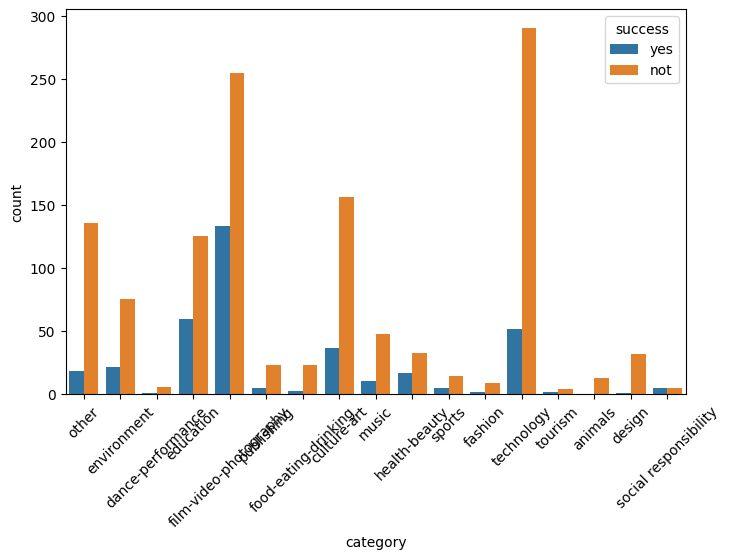

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data, x='category', hue='success', ax=ax)
ax.tick_params(axis='x', labelrotation=45)

<Axes: >

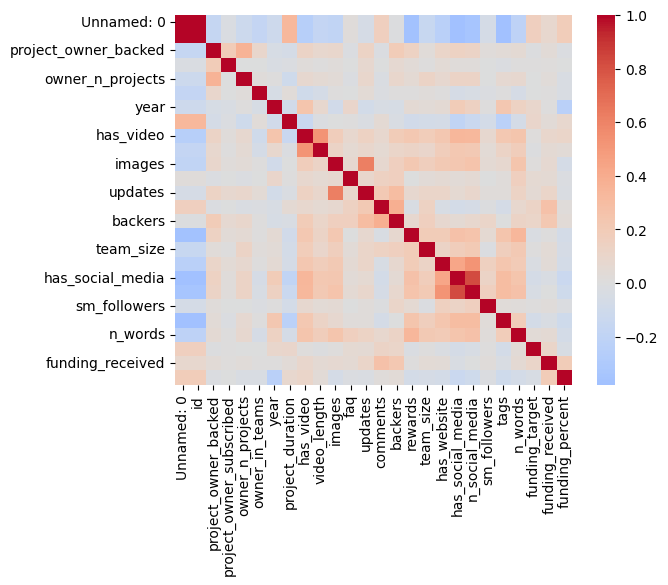

In [6]:
corr_maxtrix = data.corr(numeric_only=True)
sns.heatmap(corr_maxtrix, center=0, annot=False, cmap='coolwarm')

## Підготовка даних
Відокремлюємо цільову змінну - `success`.

Видалимо змінні, які є некорисними (id, імена людей, точні дати початку та завершення проекту) або занадто складними для обробки (описи та назви проектів, ознаки із високою кардинальністю). 

Також позбудемося ознак, які, так само як і цільова змінна, виражають результат краундфандингової кампанії: суму зібраних коштів, кількість підписників.

In [7]:
drop_columns = ['id', 'project_start_date', 'project_name', 'location',
                'project_end_date', 'project_owner_name', 'description',
                'funding_received', 'funding_percent', 'backers', 'comments', 'sm_followers']
target_column = 'success'
y = data[target_column]
X = data.drop(columns=drop_columns + [target_column])

In [8]:
X.isna().mean()

Unnamed: 0                  0.000000
platform                    0.000000
funding_type                0.000000
category                    0.000000
funding_method              0.000000
project_owner_gender        0.000000
project_owner_backed        0.000000
project_owner_subscribed    0.000000
owner_n_projects            0.000000
owner_in_teams              0.000000
region                      0.000614
year                        0.000000
project_duration            0.000000
has_video                   0.000000
video_length                0.000000
images                      0.000000
faq                         0.000000
updates                     0.000000
rewards                     0.000000
team_size                   0.000000
has_website                 0.000000
has_social_media            0.000000
n_social_media              0.000000
tags                        0.000000
n_words                     0.000000
funding_target              0.000000
dtype: float64

Пропуски є лише в ознаці `region`. Знаючи, що серед значень цієї змінної є категорія `uncertain`, можемо застосувати її для порожніх значень.

In [9]:
X['region'].value_counts()

region
marmara             638
uncertain           367
central anatolia    165
aegean              136
mediterranean       102
general              97
black sea            57
southeast            46
east                 19
Name: count, dtype: int64

In [10]:
X['region'] = X['region'].fillna('uncertain')

In [11]:
num_features = X.select_dtypes(include=np.number).columns
cat_features = X.select_dtypes(include='object').columns

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

scaler = pp.StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

## Логістична модель

In [12]:
log_model = LogisticRegression(
    class_weight='balanced'
    ).fit(X_train, y_train)
prediction = log_model.predict(X_test)

print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[304  71]
 [ 10 104]]
              precision    recall  f1-score   support

         not       0.97      0.81      0.88       375
         yes       0.59      0.91      0.72       114

    accuracy                           0.83       489
   macro avg       0.78      0.86      0.80       489
weighted avg       0.88      0.83      0.84       489



In [13]:
log_model.predict_proba(X_test)[:10]

array([[7.96714429e-01, 2.03285571e-01],
       [9.94035384e-01, 5.96461595e-03],
       [9.62653389e-01, 3.73466107e-02],
       [5.25214383e-01, 4.74785617e-01],
       [3.44203548e-07, 9.99999656e-01],
       [8.91993240e-01, 1.08006760e-01],
       [4.38014959e-01, 5.61985041e-01],
       [8.31582738e-01, 1.68417262e-01],
       [9.81773917e-01, 1.82260831e-02],
       [3.09265293e-01, 6.90734707e-01]])

Логістична регресія також присутня в `statsmodels`, але ця рееалізація чутлива до ознак з низькою варіацією, тому тут мусимо їх видалити.

In [14]:
import statsmodels.api as sm

feature_variances = X_train.apply(np.var)
variance_threshold = 0.07
X_train_sm = X_train[X_train.columns[feature_variances > variance_threshold]]
y_train_sm = y_train.map({'yes': 1, 'not': 0})

sm_model = sm.Logit(y_train_sm, X_train_sm).fit(method='nm', maxiter=1000)
print(sm_model.summary())

                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                 1139
Model:                          Logit   Df Residuals:                     1106
Method:                           MLE   Df Model:                           32
Date:                Tue, 20 May 2025   Pseudo R-squ.:                -0.03419
Time:                        21:53:12   Log-Likelihood:                -635.28
converged:                      False   LL-Null:                       -614.27
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Unnamed: 0                         -0.1211      0.157     -0.773      0.440      -0.428       0.186
platform_fonbulucu                 -0.0916      0.335     -0.273    

D:\Work\Data Science\GoIT ML\venv\Lib\site-packages\statsmodels\base\optimizer.py:737: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
D:\Work\Data Science\GoIT ML\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Дерево рішень

In [15]:
tree_model = DecisionTreeClassifier(class_weight={'yes': 4, 'not': 1})  # weights can also be set manually
tree_model.fit(X_train, y_train)
prediction = tree_model.predict(X_test)

print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[353  22]
 [ 22  92]]
              precision    recall  f1-score   support

         not       0.94      0.94      0.94       375
         yes       0.81      0.81      0.81       114

    accuracy                           0.91       489
   macro avg       0.87      0.87      0.87       489
weighted avg       0.91      0.91      0.91       489



np.float64(1.0)

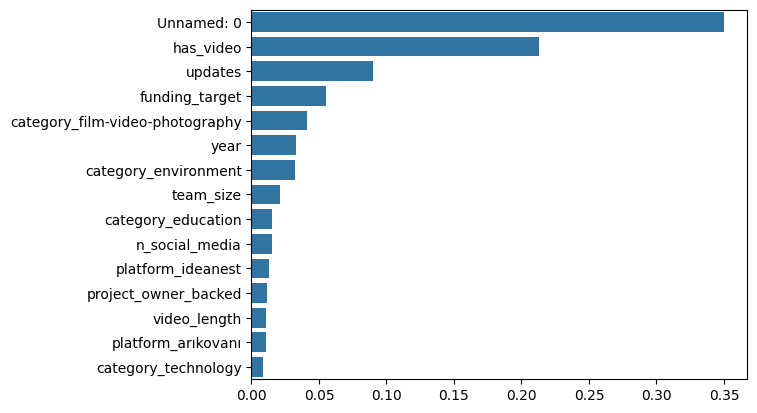

In [16]:
features = pd.Series(tree_model.feature_importances_, 
                     index=X_train.columns).sort_values(ascending=False)
g = sns.barplot(features[:15], orient='h')
np.sum(features)

[Text(0.4583333333333333, 0.875, 'has_video <= -0.155\ngini = 0.496\nsamples = 1139\nvalue = [877, 1048]'),
 Text(0.25, 0.625, 'Unnamed: 0 <= 1.7\ngini = 0.302\nsamples = 482\nvalue = [456, 104]'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'Unnamed: 0 <= -1.689\ngini = 0.226\nsamples = 473\nvalue = [456, 68]'),
 Text(0.08333333333333333, 0.125, '\n  (...)  \n'),
 Text(0.25, 0.125, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 9\nvalue = [0, 36]'),
 Text(0.6666666666666666, 0.625, 'Unnamed: 0 <= -0.824\ngini = 0.427\nsamples = 657\nvalue = [421, 944]'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 'Unnamed: 0 <= -1.105\ngini = 0.232\nsamples = 217\nvalue = [83, 536]'),
 Text(0.4166666666666667, 0.125, '\n  (...)  \n'),
 Text(0.5833333333333334, 0.125, '\n  (...)  \n'),
 Text(0.8333333333333334, 0.375, 'updates <= 0.023\ngini = 0.496\nsamples = 440\nvalue = [338, 408]'),
 Text(0.75, 0.125, '\n  (...)  \n'),
 Text(0.9166

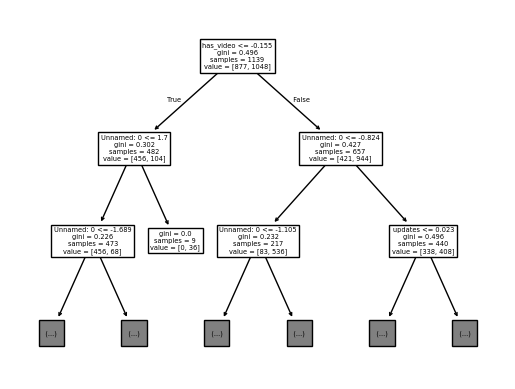

In [17]:
plot_tree(tree_model, max_depth=2, feature_names=X_train.columns)